In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","s8lp","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [3]:
sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
datos = pd.concat([tb.get_df(key=sensor) for sensor in sensores],axis=1)
# print(datos.head())
datos.index = datos.index + pd.Timedelta("-5H")
# print(datos.head())

In [4]:
#corta los datos de la fecha inicial al final
datos = datos["2021-06-30":]
datos

,cdm4160,cjmcu811,sen0219,t3022,mh-z14a,sen0220,s8lp
ts,,,,,,,
2021-06-30 00:00:04.796,NaN,3739.0,NaN,NaN,NaN,NaN,NaN
2021-06-30 00:00:05.872,277.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30 00:00:06.388,NaN,NaN,NaN,NaN,NaN,351.0,NaN
2021-06-30 00:00:09.678,NaN,NaN,934.0,437.0,-1.0,NaN,NaN
2021-06-30 00:00:10.827,NaN,3763.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-06-30 12:33:06.451,NaN,NaN,1053.0,647.0,667.0,NaN,806.0
2021-06-30 12:33:09.098,NaN,3640.0,NaN,NaN,NaN,NaN,NaN
2021-06-30 12:33:11.899,305.0,NaN,NaN,NaN,NaN,NaN,NaN


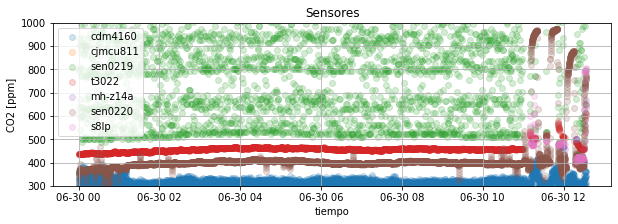

In [6]:
sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]

fig, ax = plt.subplots(figsize=(10,3))

# fecha1 = parse("2021-06-22") 
# fecha2 = fecha1 + pd.Timedelta("1D")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [7]:
#ajustar fecha si es necesario
datos.to_csv("../data/sensores_30-06-2021_02.csv")